# NLP on Tweets to Assist with Internet Outage Detection

   >##         Extract and categorize key words related to outages

   >>###         Twitterscraper
   >>###         NLTK
   >>###         Word2Vec
   >>###         Cosine Similarity
   >>###         T-Sne Plot
   
   

## Data Extraction

In [6]:
#importing packages
import twitterscraper
import datetime
import pandas as pd
import numpy as np
from twitterscraper import query_tweets

#importing warnings to turn off future warnings
import warnings
warnings.simplefilter(action='ignore')

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; x64; fr; rv:1.9.2.13) Gecko/20101203 Firebird/3.6.13'}


In [7]:
#list of cities to scrape
cities_list = ['Houston', 'SanAntonio', 'Austin', 'Dallas', 'FortWorth', 'OklahomaCity', 'Tulsa', 'SantaFe',
               'Albuquerque']

In [8]:
#for loop to interate through our city list and scrape Twitter for a selection of targeted key words
import datetime
for city in cities_list:
    df_tweets = pd.DataFrame(columns=['id','text','timestamp','user','location'])
    tweet_list = query_tweets(f'"outage" OR "internet\'s out" OR "internet out" OR "internet outage" OR "internet failure" OR "without internet" OR "internet is out" OR "wifi is out" OR "wifi out" OR "wifi\'s out" OR "without electricity" OR "lost internet" OR "lost wifi" OR "#outage" -filter:retweets near:"{city}" within:10mi',
                              begindate = datetime.date(2015,1,1),
                              enddate = datetime.date(2020,2,10),
                              poolsize = 10)
    for row, tweet in enumerate(tweet_list):
        #df_tweets.loc[row,'id'] = tweet.id
        df_tweets.loc[row,'text'] = tweet.text
        df_tweets.loc[row,'timestamp'] = tweet.timestamp
        #df_tweets.loc[row,'user'] = tweet.user
        df_tweets.loc[row,'location'] = city
    df_tweets.to_csv(f'../{city}_tweets.csv')

INFO: queries: ['"outage" OR "internet\'s out" OR "internet out" OR "internet outage" OR "internet failure" OR "without internet" OR "internet is out" OR "wifi is out" OR "wifi out" OR "wifi\'s out" OR "without electricity" OR "lost internet" OR "lost wifi" OR "#outage" -filter:retweets near:"Houston" within:10mi since:2015-01-01 until:2015-07-06', '"outage" OR "internet\'s out" OR "internet out" OR "internet outage" OR "internet failure" OR "without internet" OR "internet is out" OR "wifi is out" OR "wifi out" OR "wifi\'s out" OR "without electricity" OR "lost internet" OR "lost wifi" OR "#outage" -filter:retweets near:"Houston" within:10mi since:2015-07-06 until:2016-01-09', '"outage" OR "internet\'s out" OR "internet out" OR "internet outage" OR "internet failure" OR "without internet" OR "internet is out" OR "wifi is out" OR "wifi out" OR "wifi\'s out" OR "without electricity" OR "lost internet" OR "lost wifi" OR "#outage" -filter:retweets near:"Houston" within:10mi since:2016-01-0

INFO: Got 3 tweets (3 new).
INFO: Got 35 tweets (32 new).
INFO: Got 63 tweets (28 new).
INFO: Got 84 tweets (21 new).
INFO: Got 85 tweets (1 new).
INFO: Got 101 tweets (16 new).
INFO: Got 172 tweets (71 new).
INFO: Got 218 tweets (46 new).
INFO: Got 292 tweets (74 new).
INFO: Got 292 tweets (0 new).
INFO: queries: ['"outage" OR "internet\'s out" OR "internet out" OR "internet outage" OR "internet failure" OR "without internet" OR "internet is out" OR "wifi is out" OR "wifi out" OR "wifi\'s out" OR "without electricity" OR "lost internet" OR "lost wifi" OR "#outage" -filter:retweets near:"Dallas" within:10mi since:2015-01-01 until:2015-07-06', '"outage" OR "internet\'s out" OR "internet out" OR "internet outage" OR "internet failure" OR "without internet" OR "internet is out" OR "wifi is out" OR "wifi out" OR "wifi\'s out" OR "without electricity" OR "lost internet" OR "lost wifi" OR "#outage" -filter:retweets near:"Dallas" within:10mi since:2015-07-06 until:2016-01-09', '"outage" OR "i

INFO: Got 20 tweets (20 new).
INFO: Got 40 tweets (20 new).
INFO: Got 60 tweets (20 new).
INFO: Got 79 tweets (19 new).
INFO: Got 99 tweets (20 new).
INFO: Got 119 tweets (20 new).
INFO: Got 137 tweets (18 new).
INFO: Got 157 tweets (20 new).
INFO: Got 176 tweets (19 new).
INFO: Got 193 tweets (17 new).
INFO: queries: ['"outage" OR "internet\'s out" OR "internet out" OR "internet outage" OR "internet failure" OR "without internet" OR "internet is out" OR "wifi is out" OR "wifi out" OR "wifi\'s out" OR "without electricity" OR "lost internet" OR "lost wifi" OR "#outage" -filter:retweets near:"Tulsa" within:10mi since:2015-01-01 until:2015-07-06', '"outage" OR "internet\'s out" OR "internet out" OR "internet outage" OR "internet failure" OR "without internet" OR "internet is out" OR "wifi is out" OR "wifi out" OR "wifi\'s out" OR "without electricity" OR "lost internet" OR "lost wifi" OR "#outage" -filter:retweets near:"Tulsa" within:10mi since:2015-07-06 until:2016-01-09', '"outage" OR 

INFO: Got 2 tweets (2 new).
INFO: Got 3 tweets (1 new).
INFO: Got 6 tweets (3 new).
INFO: Got 8 tweets (2 new).
INFO: Got 14 tweets (6 new).
INFO: Got 15 tweets (1 new).
INFO: Got 16 tweets (1 new).
INFO: Got 17 tweets (1 new).
INFO: Got 17 tweets (0 new).
INFO: Got 17 tweets (0 new).


### Pre-processing

In [9]:
#reading in all the tweet dataframes

houston = pd.read_csv('../Houston_tweets.csv')
sanantonio = pd.read_csv('../SanAntonio_tweets.csv')
austin = pd.read_csv('../Austin_tweets.csv')
dallas = pd.read_csv('../Dallas_tweets.csv')
fortworth = pd.read_csv('../FortWorth_tweets.csv')
okc = pd.read_csv('../OklahomaCity_tweets.csv')
tulsa = pd.read_csv('../Tulsa_tweets.csv')
santafe = pd.read_csv('../SantaFe_tweets.csv')
albuquerque = pd.read_csv('../Albuquerque_tweets.csv')

In [10]:
# tweet counts for each city based on df columns
h = len(houston.columns)
sa = len(sanantonio.columns)
au = len(austin.columns)
d = len(dallas.columns)
fw = len(fortworth.columns)
ok = len(okc.columns)
t = len(tulsa.columns)
sf = len(santafe.columns)
al = len(albuquerque.columns)

In [11]:
#combining dataframes
df_tweets = pd.concat([houston, sanantonio, austin, dallas, tulsa, santafe, albuquerque], axis=0)
#dropping the unnamed column
df_tweets.drop(columns='Unnamed: 0', inplace = True)
#confirming that the df was stacked correctly
df_tweets.head()

,id,text,timestamp,user,location
0,NaN,It's been a while but looks like an outage nig...,2018-07-28 01:39:30,NaN,Houston
1,NaN,It's been a while but looks like an outage nig...,2018-07-28 01:39:30,NaN,Houston
2,NaN,"Outage night #highvoltagelife @ Houston, Texas...",2019-01-26 04:12:53,NaN,Houston
3,NaN,Unfortunately Pimlico and surrounding areas ar...,2019-01-22 23:19:55,NaN,Houston
4,NaN,"Outage night #highvoltagelife @ Houston, Texas...",2019-01-26 04:12:53,NaN,Houston


In [12]:
#seeing how many rows we have
df_tweets.shape

(1281, 5)

In [13]:
#saving the file to a csv
df_tweets.to_csv('df_tweets.csv')

### Cleaning Data Frame

In [14]:
#importing more packages to be used for further exploration and cleaning
import json
import regex as re
import matplotlib.pyplot as plt
from datetime import datetime
from cdo_api_py import Client
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [15]:
#creating a new colume that combines date and location 
tweets_df = pd.read_csv('df_tweets.csv',)
tweets_df.drop(columns=['Unnamed: 0'], inplace = True)
tweets_df['datestamp'] = pd.to_datetime(tweets_df['timestamp']).dt.date
tweets_df['date_place'] = tweets_df[['datestamp','location']].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)
tweets_df.head()

,id,text,timestamp,user,location,datestamp,date_place
0,NaN,It's been a while but looks like an outage nig...,2018-07-28 01:39:30,NaN,Houston,2018-07-28,"2018-07-28, Houston"
1,NaN,It's been a while but looks like an outage nig...,2018-07-28 01:39:30,NaN,Houston,2018-07-28,"2018-07-28, Houston"
2,NaN,"Outage night #highvoltagelife @ Houston, Texas...",2019-01-26 04:12:53,NaN,Houston,2019-01-26,"2019-01-26, Houston"
3,NaN,Unfortunately Pimlico and surrounding areas ar...,2019-01-22 23:19:55,NaN,Houston,2019-01-22,"2019-01-22, Houston"
4,NaN,"Outage night #highvoltagelife @ Houston, Texas...",2019-01-26 04:12:53,NaN,Houston,2019-01-26,"2019-01-26, Houston"


In [22]:
def text_clean(text):
    """function for cleaning dataframe text column and filtering stop words"""

    # removing non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    
    # converting to lower case, split into individual words
    words = letters_only.lower().split()
        
    # creating a custom list of stopwords then converting it to a set to run faster
    stop_words = ['dlvr', 'get', 'got', 'go', 'bubly', 'us', 'http', 'www', 'https', 'com', 'ourselves', 'hers', 'between', 
                  'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 
                  'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 
                  'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 
                  'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 
                  'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 
                  'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 
                  'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 
                  'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 
                  'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 
                  'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 
                  'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 
                  'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 
                  't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 
                  'how', 'further', 'was', 'here', 'than', 'twitter', 'instagram', 'node', 
                  'toplocalnow', 'cityandpress', 'pic', 'bit', 'ly', 'utm', 'source',
                 'ig', 'share', 'igshid']
    stops = set(stop_words)
    
    # removing stop words
    meaningful_words = [w for w in words if not w in stops]
    
    # joining the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [23]:
#initializing an empty list to hold the clean posts
clean_text = []

#setting up a for loop to iterate through the column using text_clean() function
j = 0
for text_update in tweets_df['text']:
    clean_text.append(text_clean(text_update)) 
    j += 1
    
#pulling the list values into a column
tweets_df['clean text'] = clean_text

#dropping the unnamed column
#tweets_df.drop(columns='Unnamed: 0', inplace = True)
#verifying that the text was cleaned
tweets_df.head(1)

,id,text,timestamp,user,location,datestamp,date_place,clean text
0,NaN,It's been a while but looks like an outage nig...,2018-07-28 01:39:30,NaN,Houston,2018-07-28,"2018-07-28, Houston",looks like outage night highvoltagelife housto...


#### The words in the data frame need to be tokenized and encoded as numerical values.  This is performed using CountVectorizer

In [24]:
#instantiate 
cvec = CountVectorizer()

In [25]:
#extracting a top range of words based on word count
top_words = pd.DataFrame(cvec.fit_transform(tweets_df['clean text']).todense(),
                             columns = cvec.get_feature_names())

top_words.sum()[top_words.sum() >= 200].sort_values(ascending = False)

outage    1181
power      666
dtype: int64

### Summarizing Filtered Tweet Content

In [26]:
#setting a value for just the top ten words
top10 = top_words.sum().sort_values(ascending = False)[:10]

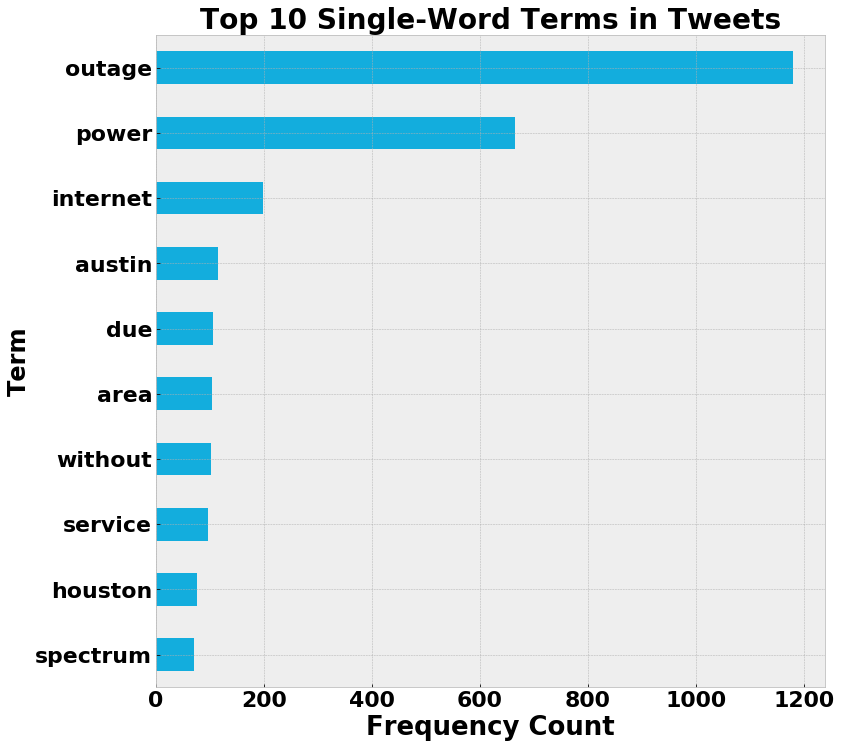

In [27]:
#plotting frequency of words
plt.style.use('bmh')
plt.figure(figsize = (12,12))
top10.sort_values(ascending=True).plot(kind = "barh", color="#13addd")
plt.title("Top 10 Single-Word Terms in Tweets", fontsize=28,fontweight='bold')
plt.xlabel("Frequency Count", fontsize=26,fontweight='bold')
plt.ylabel("Term", fontsize=24,fontweight='bold')
plt.xticks(fontsize= 22,fontweight='bold')
plt.yticks(fontsize= 22,fontweight='bold')
plt.show();

In [28]:
#tokenizing 2 - 3 word phrases
cvec = CountVectorizer(ngram_range=(2, 3))

In [29]:
#calling out the top terms
top_words = pd.DataFrame(cvec.fit_transform(tweets_df['clean text']).todense(),
                             columns = cvec.get_feature_names())

top_words.sum()[top_words.sum() >= 75].sort_values(ascending = False)

power outage    572
dtype: int64

In [30]:
#setting a value for just the top ten words
top10 = top_words.sum().sort_values(ascending = False)[:10]

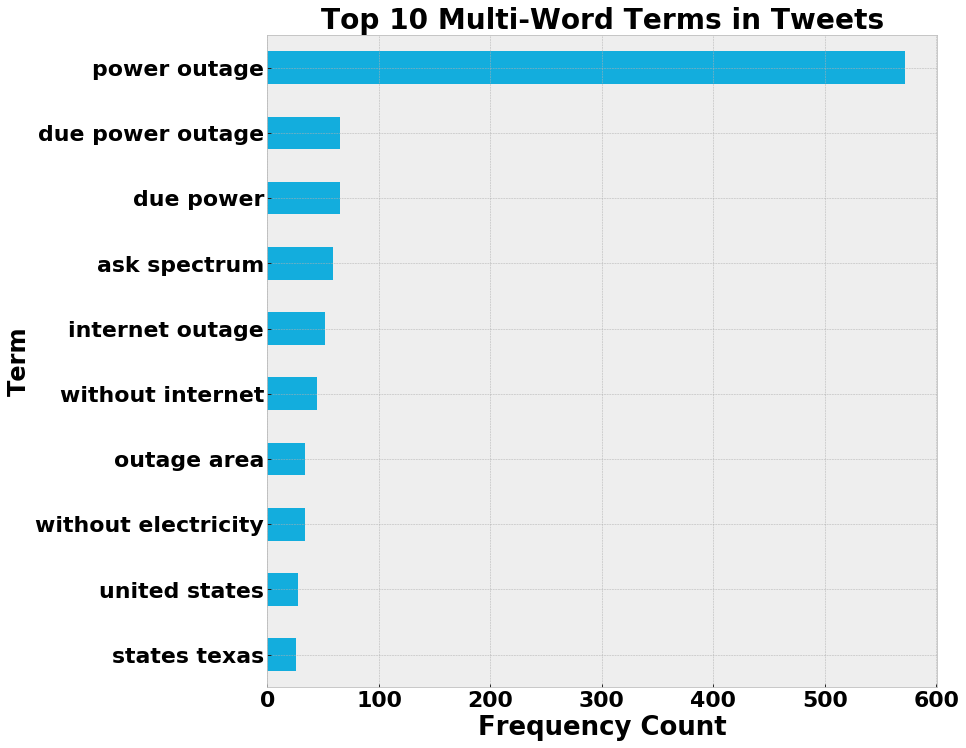

In [31]:
#plotting frequency of words
plt.style.use('bmh')
plt.figure(figsize = (12,12))
top10.sort_values(ascending=True).plot(kind = "barh", color="#13addd")
plt.title("Top 10 Multi-Word Terms in Tweets", fontsize=28,fontweight='bold')
plt.xlabel("Frequency Count", fontsize=26,fontweight='bold')
plt.ylabel("Term", fontsize=24,fontweight='bold')
plt.xticks(fontsize= 22,fontweight='bold')
plt.yticks(fontsize= 22,fontweight='bold')
plt.show();

#### Some further preprocessing is needed before training and testing the Word2Vec classifier model.

In [32]:
# Importing more packages
from __future__ import absolute_import, division, print_function
import gensim.models.word2vec as w2v
import sklearn.manifold
import seaborn as sns
import codecs
import glob
import multiprocessing
import os
import nltk

In [33]:
# create series just containing the text column
all_tweets = tweets_df['text']
print(f'Number of tweets: {len(all_tweets)}')


Number of tweets: 1281


In [34]:
# setting stopwords
stop_words = stopwords.words('english')

In [36]:
def tweets_to_tweetlist(raw):
    """Function to clean up tweets (removing urls, non-alphabetical characters)"""
    clean = re.sub(r"[^a-zA-Z ]", "", raw)
    clean = re.sub(r"http.*?\b","",clean)
    clean = re.sub(r"pictwitter.*?\b","",clean)
    clean = re.sub(r"www.*?\b","",clean)
    clean = re.sub(r'instagramcom.*?\b','',clean)
    return clean

In [37]:
# Iterate through all_tweets, clean tweets and add to tweet_list using tweets_to_tweetlist() function
tweet_list = []
for tweet in all_tweets:
    tweet_list.append(tweets_to_tweetlist(tweet))
len(tweet_list)

1281

In [38]:
# Iterate through tweet_list convert to lowercase and tokenize each tweet
tokenized_tweet_list = [tweet.lower().split(' ') for tweet in tweet_list]

In [39]:
# Remove stop words from tweets
# final_tweet_list is the version of our tweet list we will use from here on
final_tweet_list = []
for tweet in tokenized_tweet_list:
    word_list = []
    for word in tweet:
        if (word not in stop_words) & (word != ''):
            word_list.append(word)
    final_tweet_list.append(word_list)

In [41]:
def compare_tweets(n):    
    """Compare different versions of tweets and see how they changed"""
    print(all_tweets[n]) # original version of nth tweet
    print()
    print(tweet_list[n]) # cleaned version of nth tweet
    print()
    print(tokenized_tweet_list[n]) # tokenized version of nth tweet
    print()
    print(final_tweet_list[n]) # tokenized version of nth tweet (stopwords removed)

### Applying Word2Vec model

In [42]:
# Instantiate Word2Vec model
tweets2vec = w2v.Word2Vec(
    sg = 1,                                  # skip-gram train algo
    seed = 42,                               # Random Number Generator to make results repeatable
    workers = multiprocessing.cpu_count(),   # number of threads
    size = 300,                              # Dimensionality of the hidden layer
    min_count = 3,                           # how many times the word has to appear to be kept in the vocab.
    window = 7,                              # size of the window to train words
    sample = 1e-5                            # downsampling setting for frequent words
)

In [43]:
# Build tweets2vec vocabulary, haven't trained it yet, just loading it into memory
tweets2vec.build_vocab(final_tweet_list)

In [44]:
# Train tweets2vec model on final_tweet_list
tweets2vec.train(final_tweet_list, total_examples=tweets2vec.corpus_count, 
                 epochs=tweets2vec.epochs)

(4738, 68285)

In [45]:
# Create directory to store our trained tweets2vec model in
if not os.path.exists("training_model"):
    os.makedirs("training_model")

In [46]:
# Save our trained tweets2vec model in the trained folder
tweets2vec.wv.save("training_model/tweets2vec.w2v")

### A t-SNE model can show groupings of related words with stronger correllation to outages appearing as larger circles.

In [47]:
# t-SNE Model Exploration

# reading in the trained data to explore it
tweets2vec = tweets2vec.wv.load("training_model/tweets2vec.w2v")

In [48]:
# Instantiating the t-SNE plot and establishing the parameters. 
tsne = sklearn.manifold.TSNE(n_components = 2, random_state = 42, perplexity= 70,
                             learning_rate = 150,verbose =1,n_iter=5000)

In [49]:
#Coverting to word embeddings
all_word_vectors_matrix = tweets2vec.wv.syn0

In [50]:
# Training it will take some time...
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 938 samples in 0.014s...
[t-SNE] Computed neighbors for 938 samples in 0.460s...
[t-SNE] Computed conditional probabilities for sample 938 / 938
[t-SNE] Mean sigma: 0.003854
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.968178
[t-SNE] KL divergence after 1550 iterations: 2.210766


In [51]:
#creating a dataframe of the t-SNE coordinates
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[tweets2vec.vocab[word].index])
            for word in tweets2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

### Vectorizing corpus of key words and computing cosine similarity scores

In [53]:
def vectorize_corpus(keyword_list):  
    """Vectorization function"""
    
    # Instantiate counter for number of words in keyword_list that exists
    n_words = 0
    
    # Create template for cumulative corpus vector sum
    corpus_vec_sum = np.zeros((1,300))                 
    
    # Scan through each word in list
    for word in keyword_list:
        if word in tweets2vec.vocab:                    
            word_vec = tweets2vec.word_vec(word)        
            n_words +=1                                
            corpus_vec_sum = corpus_vec_sum + word_vec 

    # Compute average vector by taking cumulative vector sum and dividing it by number of words traced
    corpus_avg_vec = corpus_vec_sum/n_words
    
    # Squeeze this N-dimensional nested array object into a 1-D array to streamline future processing
    corpus_avg_vec = np.squeeze(corpus_avg_vec)
    
    return(corpus_avg_vec)

In [54]:
#defining cosine similarity function
def cos_sim(vector_1, vector_2):
    dp = np.dot(vector_1, vector_2)
    magnitude_v1 = np.sqrt(np.dot(vector_1,vector_1))
    magnitude_v2 = np.sqrt(np.dot(vector_2,vector_2))
    return(dp/(magnitude_v1*magnitude_v2))

In [55]:
#creating pos/neg keyword lists 

# List of words that may describe an internet outage
internet_out = ['damage', 'cut', 'equipment', 'router', 'modem', 'ont' 'computer', 'website',
                'storm', 'flooding', 'failure', 'cable', 'buffering', 'slow', 
                'netflix', 'streaming', 'video', 'email', 'facebook','earthquake', 'speed', 
                'congestion', 'phone', 'tablet', 'laptop', 'firestick', 'roku', 'wireless', 
                'wifi', 'broadband', 'dsl','amazon', 'google', 'instagram', 'twitter', 
                'hulu', 'alexa', 'camera', 'feed', 'service', 'network','youtube', 
                'internet', 'fiber', 'delay', '5G', 'port', 'ethernet', 'pole', 'wire', 'data']

# List of words that likely are not associated with an internet outage
not_out = ['good', 'pleased', 'fast', 'cellular', 'data', 'transformer', 'candle', 'lights', 
           'solar', 'charge','generator', 'substation', 'energy', 'electrical', '4G', 
           'apple', 'microsoft', 'monitor', 'outlet', 'refrigerator', 'lamp', 'clear', 
           'sunny', 'happy', 'love', 'recommend', 'microwave', 'fine', 'power', 'electricity']

In [56]:
#vectorizing the keyword lists
int_out_vec = vectorize_corpus(internet_out)
not_out_vec = vectorize_corpus(not_out)

In [57]:
#scoring words against our keywords
points['int_out_cs'] = [cos_sim(tweets2vec.word_vec(word),int_out_vec) for word in points['word']]
points['not_out_cs'] = [cos_sim(tweets2vec.word_vec(word),not_out_vec) for word in points['word']]
points['int_out_label'] = np.where(points['int_out_cs'] >= points['not_out_cs'],'internet_out','not_out')
points.head()

,word,x,y,int_out_cs,not_out_cs,int_out_label
0,looks,-0.475765,1.932251,-0.042973,0.036364,not_out
1,like,0.323023,1.699348,0.079948,-0.159794,internet_out
2,outage,2.099051,0.223197,0.030726,0.086603,not_out
3,night,0.087008,-0.621598,-0.067107,0.001782,not_out
4,highvoltagelife,1.329172,0.489275,-0.041195,0.035424,not_out


In [58]:
#getting the counts for each label
points['int_out_label'].value_counts()

internet_out    481
not_out         457
Name: int_out_label, dtype: int64

In [59]:
#sorting to see what words appear up top for legitimate internet outages
points[points['int_out_label'] == 'internet_out'].sort_values(by = 'int_out_cs',ascending = False).head(10)

,word,x,y,int_out_cs,not_out_cs,int_out_label
23,internet,0.799904,1.736802,0.324226,-0.037021,internet_out
389,google,-0.783639,-0.747915,0.282377,0.017181,internet_out
249,equipment,-0.425021,0.153341,0.245951,-0.017600,internet_out
233,slow,-0.429532,1.376197,0.234171,0.036438,internet_out
492,facebook,0.394238,-1.079886,0.233049,-0.034334,internet_out
178,pole,-0.838978,1.444899,0.230700,0.019168,internet_out
857,website,-1.288558,-0.627639,0.220191,0.130820,internet_out
635,delay,1.312596,-0.192575,0.216041,-0.102278,internet_out
134,cut,-1.596229,-0.526317,0.215142,0.025757,internet_out
518,netflix,1.303300,-1.631793,0.204053,0.041419,internet_out


In [60]:
#seeing what the top are for not a legitamate internet outage
points[points['int_out_label'] == 'not_out'].sort_values(by = 'not_out_cs',ascending = False).head(10)

,word,x,y,int_out_cs,not_out_cs,int_out_label
12,power,-2.177352,1.634602,0.073087,0.335214,not_out
281,clear,0.955130,-0.255165,0.008097,0.310920,not_out
173,electricity,1.749756,-0.297165,-0.022917,0.293686,not_out
592,fine,-1.162414,0.334708,-0.023543,0.290279,not_out
825,love,0.566905,0.991377,-0.159162,0.284711,not_out
795,substation,0.690748,-0.623002,0.068101,0.276105,not_out
673,lights,-0.953640,-1.026506,-0.008045,0.257472,not_out
292,energy,2.082668,1.225758,0.007361,0.249508,not_out
919,sunny,-0.061535,0.886500,-0.013430,0.232617,not_out
788,cellular,0.703887,-0.152483,-0.138143,0.228972,not_out


In [61]:
#checking out what words are most similar to the word "internet"
tweets2vec.most_similar("internet", topn=10)

[('doors', 0.18678288161754608),
 ('campuswide', 0.14944231510162354),
 ('facility', 0.14328399300575256),
 ('double', 0.14276637136936188),
 ('closes', 0.14262714982032776),
 ('parts', 0.14243170619010925),
 ('long', 0.14225316047668457),
 ('hell', 0.1394481062889099),
 ('vehicle', 0.13771438598632812),
 ('austin', 0.13762134313583374)]

In [62]:
#checking out what words are most similar to the word "outage"
tweets2vec.most_similar("outage")

[('seeing', 0.18007370829582214),
 ('social', 0.17860008776187897),
 ('areas', 0.15525273978710175),
 ('suffered', 0.15136316418647766),
 ('cannot', 0.1479930877685547),
 ('launches', 0.14233912527561188),
 ('wifi', 0.14207112789154053),
 ('raven', 0.14099448919296265),
 ('yay', 0.13431520760059357),
 ('crews', 0.13066598773002625)]

In [63]:
#taking a look at each tweet with both scores so we can review what word groups were used to create the score
#this is helpful for fine tuning the model
for tweet in final_tweet_list:
    print(tweet)
    tweet_avg_vec = vectorize_corpus(tweet)
    print(f'Internet Out CS: {cos_sim(tweet_avg_vec,int_out_vec)}')
    print(f'Not Out CS: {cos_sim(tweet_avg_vec,not_out_vec)}')

['looks', 'like', 'outage', 'night', 'highvoltagelife', 'houston', 'texas']
Internet Out CS: 0.017423488501761134
Not Out CS: -0.0016744792298090882
['looks', 'like', 'outage', 'night', 'highvoltagelife', 'houston', 'texas']
Internet Out CS: 0.017423488501761134
Not Out CS: -0.0016744792298090882
['outage', 'night', 'highvoltagelife', 'houston', 'texas']
Internet Out CS: 0.005367310167154114
Not Out CS: 0.04881726335300009
['unfortunately', 'pimlico', 'surrounding', 'areas', 'currently', 'experiencing', 'power', 'outage', 'rain', 'forecast', 'cancelling', 'tuesdays', 'steak', 'night', 'hopingnfor']
Internet Out CS: 0.017853706602792042
Not Out CS: 0.09505087712274915
['outage', 'night', 'highvoltagelife', 'houston', 'texas']
Internet Out CS: 0.005367310167154114
Not Out CS: 0.04881726335300009
['unfortunately', 'pimlico', 'surrounding', 'areas', 'currently', 'experiencing', 'power', 'outage', 'rain', 'forecast', 'cancelling', 'tuesdays', 'steak', 'night', 'hopingnfor']
Internet Out CS:

Not Out CS: 0.1886635429598157
['xfinity', 'want', 'every', 'penny', 'back', 'outage']
Internet Out CS: 0.019657247507656645
Not Out CS: 0.040981064979167384
['decide', 'project', 'home', 'come', 'home', 'wifi', 'smh']
Internet Out CS: 0.005925078898708028
Not Out CS: 0.0679697204919565
['robbery', 'pvuncut', 'power', 'outage', 'pv', 'twitter', 'role', 'weekend']
Internet Out CS: 0.15939621257230652
Not Out CS: 0.22192257174729535
['planned', 'outage', 'something', 'yall', 'maybe', 'yall', 'elevators', 'would', 'stop', 'breaking']
Internet Out CS: -0.09537222005742556
Not Out CS: -0.02233554775770857
['two', 'types', 'millennials', 'well', 'xennials', 'know', 'life', 'without', 'internet', 'true', 'millennials', 'dont']
Internet Out CS: 0.1291857405246426
Not Out CS: -0.011523658840031108
['due', 'unexpected', 'power', 'outage', 'closed', 'week', 'expect', 'open', 'mid', 'late', 'week', 'following', 'week']
Internet Out CS: 0.0635321927520148
Not Out CS: 0.060149330448932344
['theres',

Not Out CS: 0.20354781120873433
['idea', 'power', 'outage', 'westlake', 'high', 'school', 'stadium', 'power', 'outkvue', 'jademkvue', 'terrigkvue']
Internet Out CS: 0.03220390950133888
Not Out CS: 0.26061480865137004
['whooooa', 'power', 'outage', 'west', 'lake', 'office', 'went', 'dark', 'zombies', 'terrorists', 'anarchy']
Internet Out CS: 0.008300550182553776
Not Out CS: 0.17125182619164195
['kvue', 'power', 'outage', 'westlake', 'connection']
Internet Out CS: 0.06269856152248314
Not Out CS: 0.25344540408588795
['config', 'errors', 'better', 'hackers', 'facebook', 'downtime', 'event', 'january', 'th', 'hourlong', 'outage']
Internet Out CS: 0.030428118158638745
Not Out CS: -0.036840939702317554
['morning', 'biz', 'digest', 'facebook', 'outage', 'company', 'denies', 'hack', 'video']
Internet Out CS: 0.20267110452830137
Not Out CS: 0.05241941043218272
['maybe', 'need', 'parenting', 'class', 'lisa', 'allow', 'max', 'live', 'without', 'electricity', 'wks', 'wow', 'rhobh']
Internet Out CS:

Not Out CS: 0.2082618035018587
['im', 'glad', 'moved', 'omg', 'deal', 'another', 'several', 'day', 'long', 'power', 'outage', 'id', 'omw', 'canada', 'already']
Internet Out CS: 0.11352709805437265
Not Out CS: 0.11628349264903949
['power', 'outage']
Internet Out CS: 0.07230187131118812
Not Out CS: 0.29399602805031516
['westin', 'still', 'stuck', 'elevator', 'due', 'power', 'outage', 'due', 'tornado', 'would', 'nice', 'hear', 'somebody']
Internet Out CS: 0.015165273366124455
Not Out CS: 0.14055320201063637
['students', 'lost', 'internet', 'n', 'streaming', 'dont', 'work', 'woods']
Internet Out CS: 0.08642211883331721
Not Out CS: -0.03509756357658203
['unexpected', 'downside', 'power', 'outage', 'hear', 'entirety', 'father', 'laws', 'phone', 'conversation', 'pissing', 'tf']
Internet Out CS: 0.11960206980512572
Not Out CS: 0.17924769588159406
['ca', 'outagehere', 'go']
Internet Out CS: 0.05798435616845295
Not Out CS: 0.0744533389725607
['wow', 'thanks', 'askspectrum', 'made', 'miss', 'favo

In [64]:
#creating a dataframe of the scores
tweets_df['score_int_out']     = [cos_sim(vectorize_corpus(tweet),int_out_vec) for tweet in final_tweet_list]
tweets_df['score_not_out'] = [cos_sim(vectorize_corpus(tweet),not_out_vec) for tweet in final_tweet_list]
tweets_df.head()

,id,text,timestamp,user,location,datestamp,date_place,clean text,score_int_out,score_not_out
0,NaN,It's been a while but looks like an outage nig...,2018-07-28 01:39:30,NaN,Houston,2018-07-28,"2018-07-28, Houston",looks like outage night highvoltagelife housto...,0.017423,-0.001674
1,NaN,It's been a while but looks like an outage nig...,2018-07-28 01:39:30,NaN,Houston,2018-07-28,"2018-07-28, Houston",looks like outage night highvoltagelife housto...,0.017423,-0.001674
2,NaN,"Outage night #highvoltagelife @ Houston, Texas...",2019-01-26 04:12:53,NaN,Houston,2019-01-26,"2019-01-26, Houston",outage night highvoltagelife houston texas p b...,0.005367,0.048817
3,NaN,Unfortunately Pimlico and surrounding areas ar...,2019-01-22 23:19:55,NaN,Houston,2019-01-22,"2019-01-22, Houston",unfortunately pimlico surrounding areas curren...,0.017854,0.095051
4,NaN,"Outage night #highvoltagelife @ Houston, Texas...",2019-01-26 04:12:53,NaN,Houston,2019-01-26,"2019-01-26, Houston",outage night highvoltagelife houston texas p b...,0.005367,0.048817


In [65]:
#saving the csv
tweets_df.to_csv('final_scored_data.csv')

### t-SNE plot to visualize word groupings

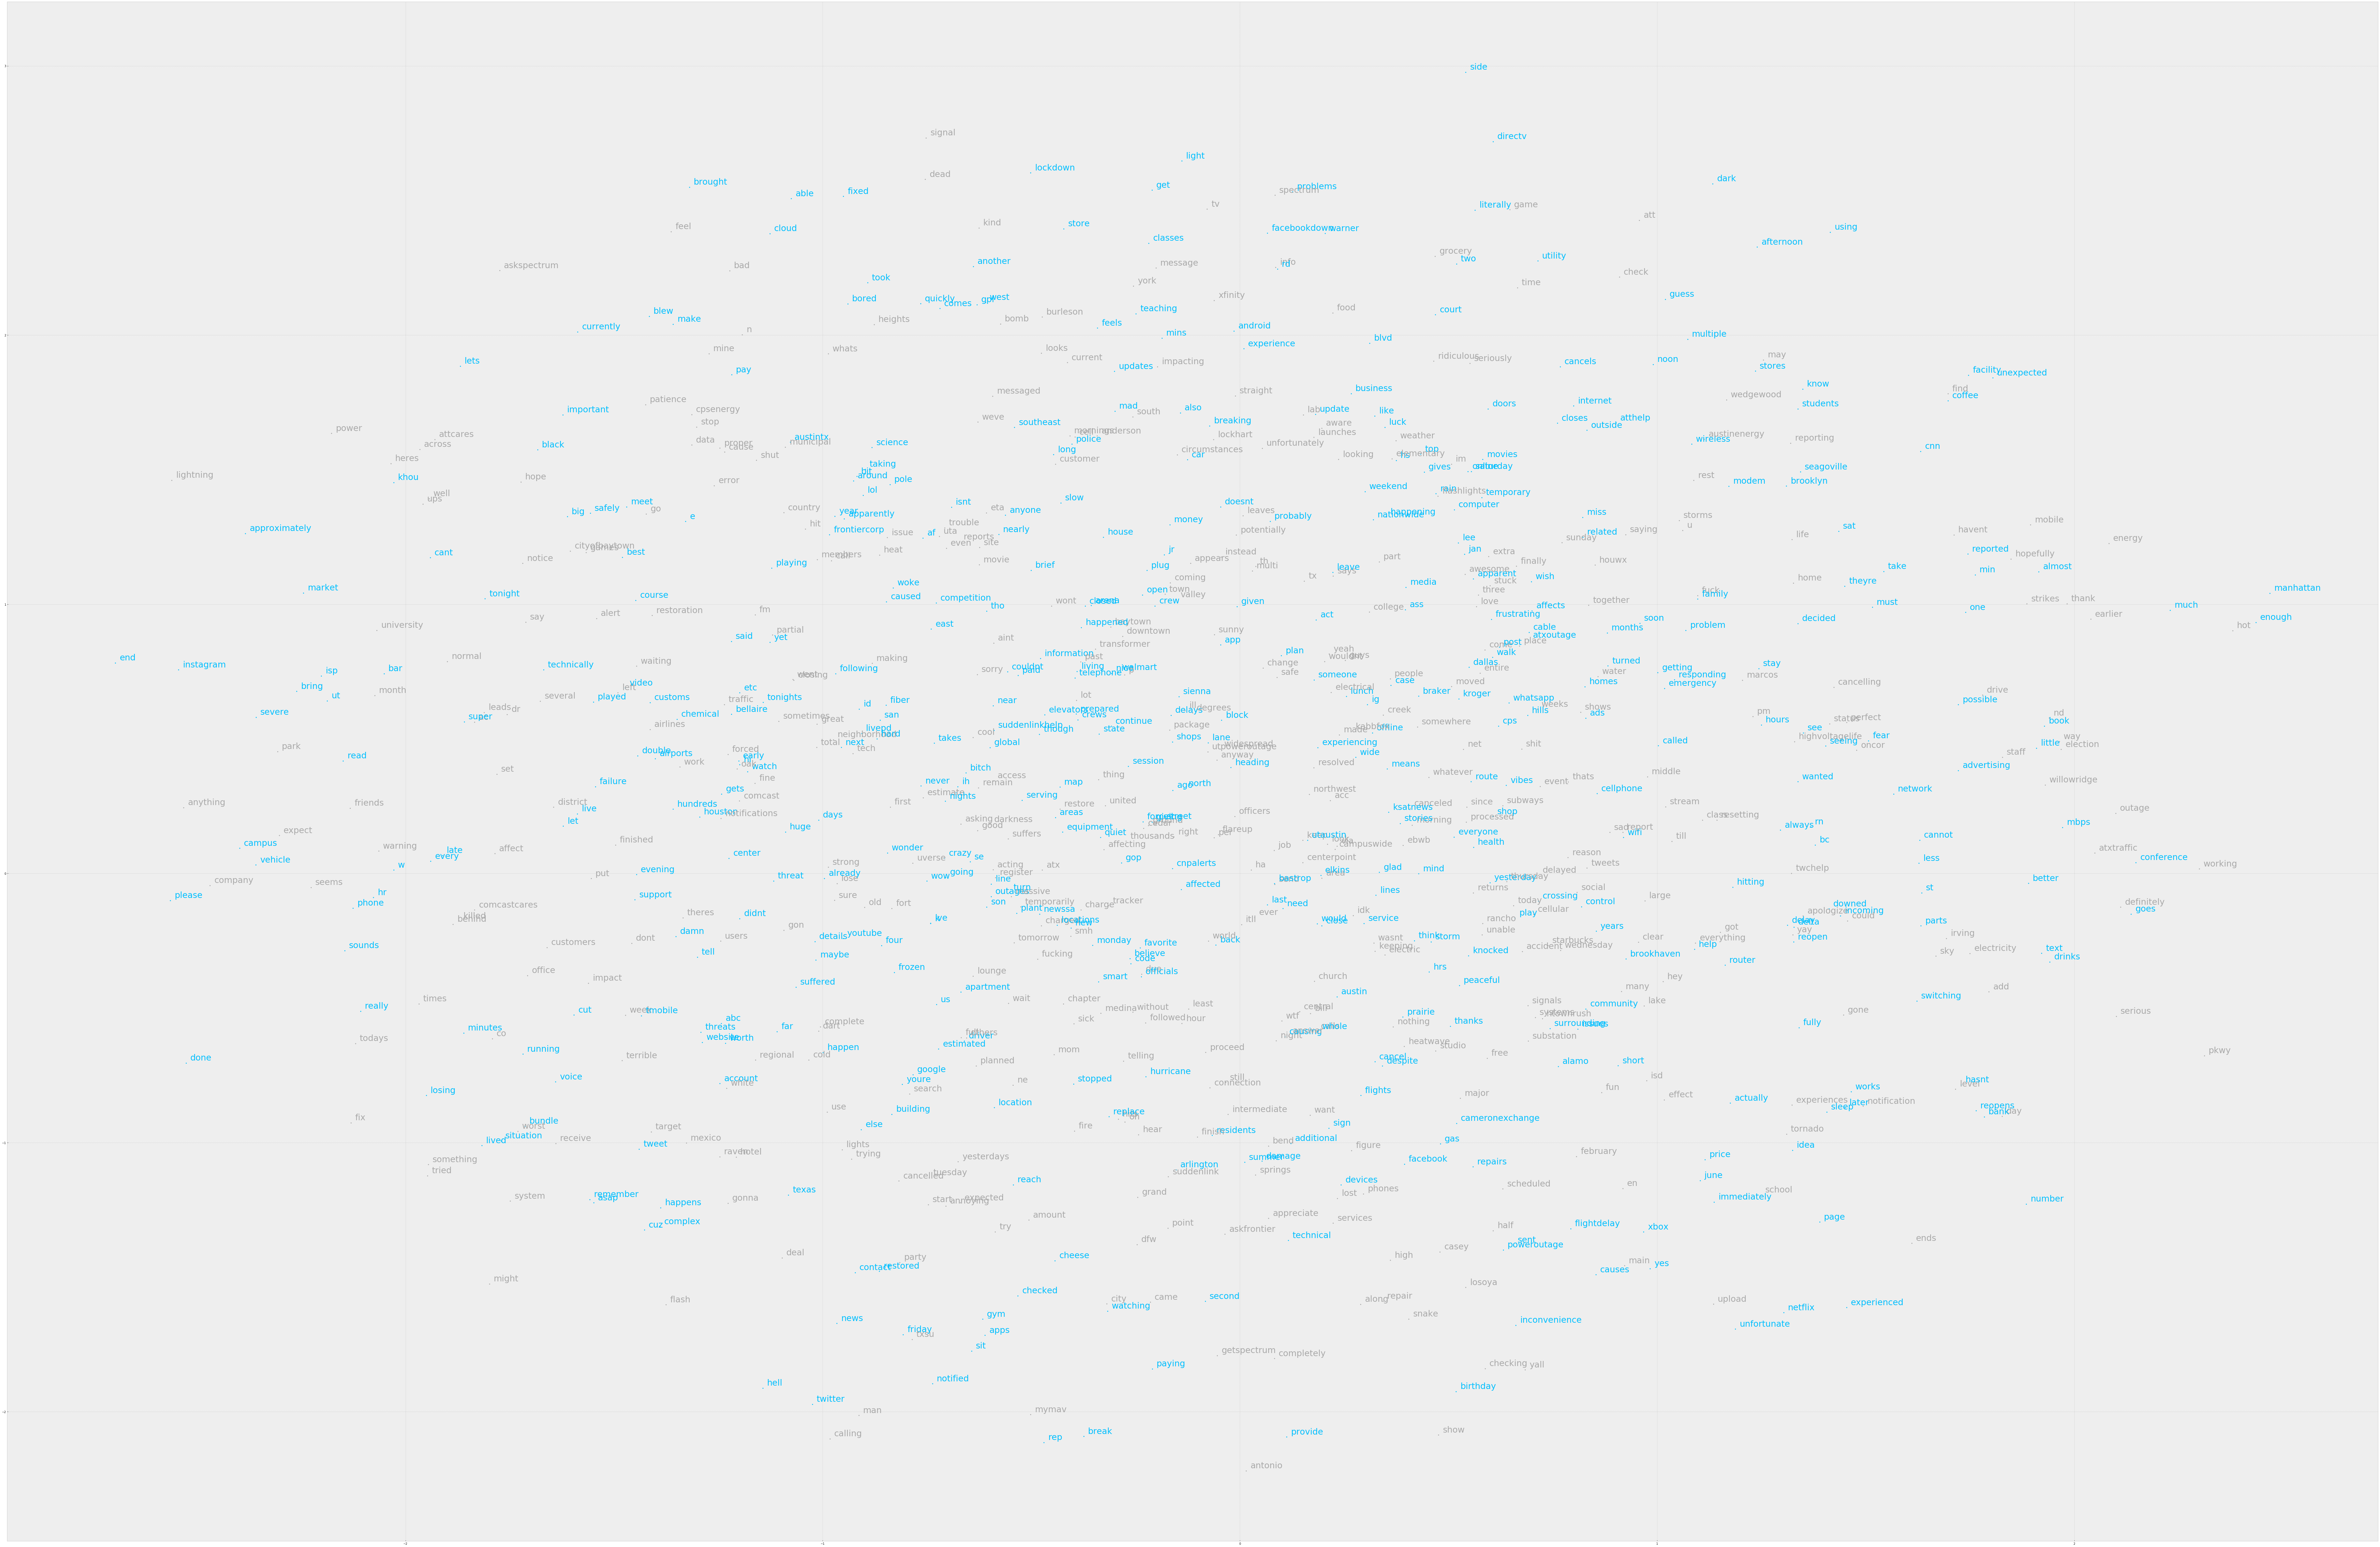

In [66]:
#plotting the t-SNE
plt.figure(figsize = (150,100))
colors = {'internet_out':'deepskyblue', 'not_out':'darkgrey'}
for i,word in enumerate(points['word']):
    x = points['x'][i]
    y = points['y'][i]
    color = points['int_out_label'].apply(lambda x: colors[x])[i]
    plt.scatter(x, y, color=color, s = 10)
    plt.text(x+0.01, y+0.01, word,color = color, fontsize=30)
plt.show()

# to see the plot please zoom in.

In [67]:
#creating and exporting an html file of the t-SNE plot

#import numpy as np

from bokeh.plotting import figure, show, output_file,ColumnDataSource

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

source = ColumnDataSource(data = dict(
    x = points['x'],
    y = points['y'],
    label = points['int_out_label'],
    power_out_cs = points['int_out_cs'],
    not_out_cs = points['not_out_cs'],
    radii = ((points['int_out_cs']*points['int_out_label'].apply(lambda x: 1 if (x == 'internet_out') else 0))+(points['not_out_cs']*points['int_out_label'].apply(lambda x: 0 if (x == 'internet_out') else 1)))*0.25,
    color = points['int_out_label'].apply(lambda x: colors[x]),
    words = points['word']
))
TOOLTIPS =[
    ('word', '@words'),
    ('class','@label'),
    ('power out cos sim','@power_out_cs'),
    ('not out cos sim','@not_out_cs')
]
p = figure(title = 't-SNE Plot of Words in Tweets',
           tooltips=TOOLTIPS)

p.scatter('x', 'y', radius='radii', source = source,
          fill_color='color', line_color = None, fill_alpha=0.3)

output_file("../tsne_scatter.html", title="tsne_scatter.py")

show(p)  # open a browser